In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
#callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Get the data and pre-process it

In [3]:
x_train.shape , y_train.shape ,x_test.shape ,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

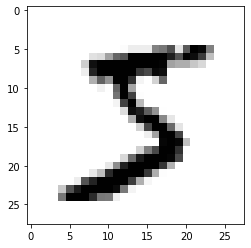

In [4]:
plt.imshow(x_train[0],cmap='binary')

In [5]:
def plot_input_img(i):
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

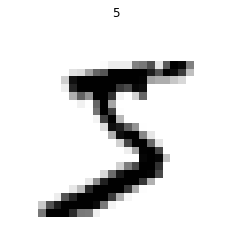

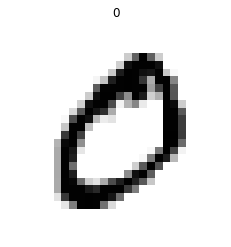

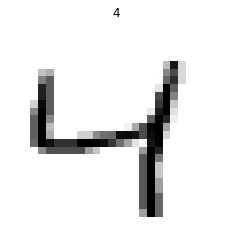

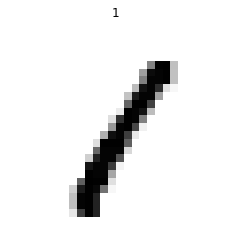

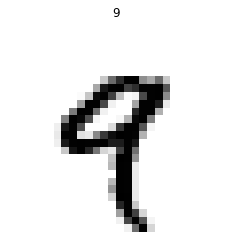

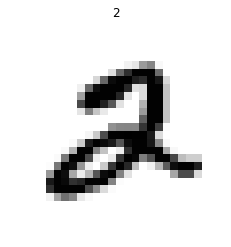

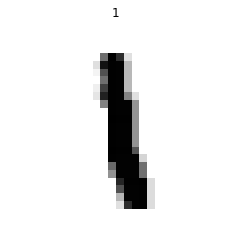

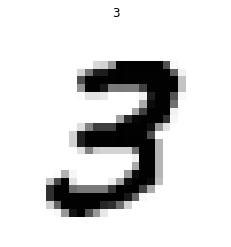

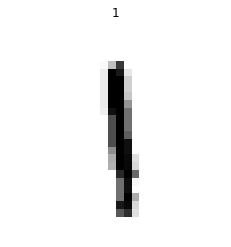

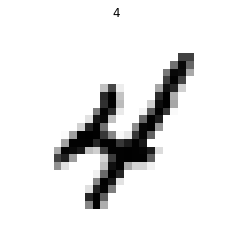

In [6]:
for i in range(10):
    plot_input_img(i)

In [7]:
#pre process the images
#normalizing the image to [0,1] range
x_train = x_train.astype(np.float32)/225
x_test = x_test.astype(np.float32)/225

In [8]:
#reshape or expand the dimentions of images to (28,28,1)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test, -1)

In [9]:
#convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
y_test = keras.utils.to_categorical(y_test)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

In [14]:
model.add(Conv2D(64,(3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

In [15]:
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [17]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [18]:
# Earlystopping
es = EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

In [19]:
# Model check point
mc = ModelCheckpoint("./bestmodel.h5", monitor='val_acc', verbose=1, save_best_only= True)
cb =[es,mc]

In [20]:
his =model.fit(x_train, y_train, epochs=50, validation_split=0.3,callbacks=cb)

Epoch 1/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2126 - accuracy: 0.9353 - val_loss: 0.0776 - val_accuracy: 0.9772
Epoch 2/50
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0622 - val_accuracy: 0.9808
Epoch 3/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 4/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0447 - val_accuracy: 0.9858
Epoch 5/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.0406 - val_accuracy: 0.9878
Epoch 6/50
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0428 - val_accuracy: 0.9879
Epoch 7/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0414 -

In [21]:
model_S = keras.models.load_model=("E://handwriting//tens//bestmodel.h5")

In [25]:
score = model.evaluate(x_test,y_test)

print(f"the model accuracy is {score[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9926
the model accuracy is 0.9926000237464905
